In [8]:
import numpy as np
import pandas as pd
import scanpy as sc

import cello

import matplotlib.pyplot as pl
from matplotlib import rcParams

import os


wr_dir = '/Users/jplab/Desktop/DAILY_CODE_DATA/2022-5/data/5-7_singlecell_scanpy_demo'
os.chdir(wr_dir)

cello_resource_loc = '/Users/jplab/Desktop/freq_used_file/'

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3 
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 8.2.0
appnope             0.1.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.2
cello               NA
cffi                1.14.3
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.2
decorator           4.4.2
dill                0.3.4
entrypoints         0.3
executing           0.8.3
google              NA
h5py                2.10.0
hypergeom_ufunc     NA
igraph              0.9.10
ipykernel           5.5.5
ipython_genutils    0.2.0
jedi                0.17.1
joblib              0.17.0
kiwisolver          1.3.0
leidenalg           0.8.10
llvmlite            0.34.0
louvain             0.7.1
matplotlib          3.5.2
mkl                 2.3.0
mpl_toolkits        NA
natsort             8.1.0
nbinom_ufunc        NA
numba    

In [9]:
filtered_matrix_h5 = "/Users/jplab/Downloads/GSE122960_RAW/GSM3489183_IPF_01_filtered_gene_bc_matrices_h5.h5" 
adata = sc.read_10x_h5(filtered_matrix_h5, genome='GRCh38',gex_only=True)
adata.var_names_make_unique()

adata

reading /Users/jplab/Downloads/GSE122960_RAW/GSM3489183_IPF_01_filtered_gene_bc_matrices_h5.h5
 (0:00:00)


/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2253 × 33694
    var: 'gene_ids'

In [10]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

adata


normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 2253 × 33694
    var: 'gene_ids'
    uns: 'log1p'

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes=10000)

sc.pp.pca(
adata,
n_comps=50,
use_highly_variable=True
)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [12]:
sc.pp.neighbors(adata, n_neighbors=15)
sc.tl.leiden(adata, resolution=2.0)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [13]:
adata.X = adata.X.todense()
adata

AnnData object with n_obs × n_vars = 2253 × 33694
    obs: 'leiden'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [14]:
model_prefix = 'GSM3489183_IPF_01_filtered_gene_bc_matrices_h5'

cello.scanpy_cello(
  adata,
  clust_key='leiden',
  rsrc_loc=cello_resource_loc,
  out_prefix=model_prefix,
  log_dir=cello_resource_loc
)

Found CellO resources at '/Users/jplab/Desktop/freq_used_file/resources'.
Checking if any pre-trained model is compatible with this input dataset...


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Could not find compatible pre-trained model.
Found CellO resources at '/Users/jplab/Desktop/freq_used_file/resources'.
Loading ontology...
Loading expression data from /Users/jplab/Desktop/freq_used_file/resources/training_set/log_tpm.h5...
Loaded matrix of shape (4293, 58243)
done.
Inferred that input file uses HGNC gene symbols.
Of 33694 genes in the input file, 21278 were found in the training set of 58243 genes.
Training model...
Fitting PCA with 3000 components...
done.
Transforming with PCA...
done.
(1/317)
Training classifier for label CL:0000576...
Number of positive items: 314
Number of negative items: 3950
(2/317)
Training classifier for label CL:0002087...
Number of positive items: 2010
Number of negative items: 2267
(3/317)
Training classifier for label CL:2000001...
Number of positive items: 1575
Number of negative items: 2242
(4/317)
Training classifier for label CL:0000842...
Number of positive items: 2010
Number of negative items: 2267
(5/317)
Training classifier for la

/opt/anaconda3/lib/python3.8/site-packages/cello/cello.py:477: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad_mean_clust = AnnData(
/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Transforming with PCA...
done.
Making predictions for each classifier...
Running solver on item 1/27...
Running solver on item 2/27...
Running solver on item 3/27...
Running solver on item 4/27...
Running solver on item 5/27...
Running solver on item 6/27...
Running solver on item 7/27...
Running solver on item 8/27...
Running solver on item 9/27...
Running solver on item 10/27...
Running solver on item 11/27...
Running solver on item 12/27...
Running solver on item 13/27...
Running solver on item 14/27...
Running solver on item 15/27...
Running solver on item 16/27...
Running solver on item 17/27...
Running solver on item 18/27...
Running solver on item 19/27...
Running solver on item 20/27...
Running solver on item 21/27...
Running solver on item 22/27...
Running solver on item 23/27...
Running solver on item 24/27...
Running solver on item 25/27...
Running solver on item 26/27...
Running solver on item 27/27...
Checking if any pre-trained model is compatible with this input dataset.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Of 33694 genes in the input file, 21278 were found in the training set of 58243 genes.
Of 33694 genes in the input file, 20130 were found in the training set of 31283 genes.
Using thresholds stored in /Users/jplab/Desktop/freq_used_file/resources/trained_models/ir.10x_genes_thresholds.tsv
Binarizing classifications...
Mapping each sample to its predicted labels...
Computing the most-specific predicted labels...
Loading ontology...
Item 0 predicted to be "alveolar macrophage (CL:0000583)"
Item 1 predicted to be "defensive cell (CL:0000473)"
Item 10 predicted to be "endothelial cell of umbilical vein (CL:0002618)"
Item 11 predicted to be "epithelial cell of upper respiratory tract (CL:0002631)"
Item 12 predicted to be "T-helper 2 cell (CL:0000546)"
Item 13 predicted to be "precursor cell (CL:0011115)"
Item 14 predicted to be "alveolar macrophage (CL:0000583)"
Item 15 predicted to be "alveolar macrophage (CL:0000583)"
Item 16 predicted to be "type II pneumocyte (CL:0002063)"
Item 17 predi

## with existing model

In [ ]:
model_prefix = 'GSM3489183_IPF_01_filtered_gene_bc_matrices_h5'

cello.scanpy_cello(
  adata,
  clust_key='leiden',
  rsrc_loc=cello_resource_loc,
  model_file=f'{model_prefix}.model.dill'
)

In [24]:
adata.obs

,leiden,early embryonic cell (probability),cultured cell (probability),germ line stem cell (probability),male germ cell (probability),male germ line stem cell (probability),spermatocyte (probability),spermatid (probability),sperm (probability),spermatogonium (probability),...,epithelial cell of alveolus of lung (binary),mononuclear cell of bone marrow (binary),spinal cord motor neuron (binary),precursor cell (binary),lung secretory cell (binary),trophectodermal cell (binary),bone marrow hematopoietic cell (binary),peripheral blood mononuclear cell (binary),central nervous system neuron (binary),Most specific cell type
AAACCTGAGCACCGCT-1,2,0.000373,0.023319,0.000047,0.000044,0.000044,0.000044,0.000017,0.000019,0.000044,...,False,False,False,False,False,False,False,False,False,alveolar macrophage
AAACCTGCACAGATTC-1,23,0.000254,0.081511,0.000669,0.000388,0.000388,0.000023,0.000060,0.000119,0.000354,...,False,False,False,False,False,False,False,False,False,fibroblast
AAACCTGGTAAGGGCT-1,3,0.000650,0.842905,0.000421,0.000275,0.000275,0.000109,0.000036,0.000065,0.000205,...,True,False,False,False,True,False,False,False,False,type II pneumocyte
AAACCTGGTCAAACTC-1,5,0.000218,0.065610,0.000061,0.000039,0.000039,0.000039,0.000020,0.000010,0.000039,...,False,False,False,False,False,False,False,False,False,"myeloid dendritic cell, human"
AAACCTGGTGCAACGA-1,0,0.000403,0.087329,0.000056,0.000044,0.000044,0.000044,0.000019,0.000016,0.000044,...,False,False,False,False,False,False,False,False,False,alveolar macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCCACGTC-1,3,0.000650,0.842905,0.000421,0.000275,0.000275,0.000109,0.000036,0.000065,0.000205,...,True,False,False,False,True,False,False,False,False,type II pneumocyte
TTTGTCACACGTCAGC-1,15,0.000417,0.079308,0.000050,0.000042,0.000042,0.000038,0.000013,0.000015,0.000042,...,False,False,False,False,False,False,False,False,False,alveolar macrophage
TTTGTCACACTTACGA-1,11,0.000045,0.009389,0.000903,0.000682,0.000682,0.000633,0.000371,0.000027,0.000523,...,False,False,False,False,False,False,False,False,False,epithelial cell of upper respiratory tract
TTTGTCAGTGAACCTT-1,10,0.000280,0.011101,0.000799,0.000448,0.000448,0.000041,0.000054,0.000039,0.000142,...,False,False,False,False,False,False,False,False,False,endothelial cell of umbilical vein


In [25]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


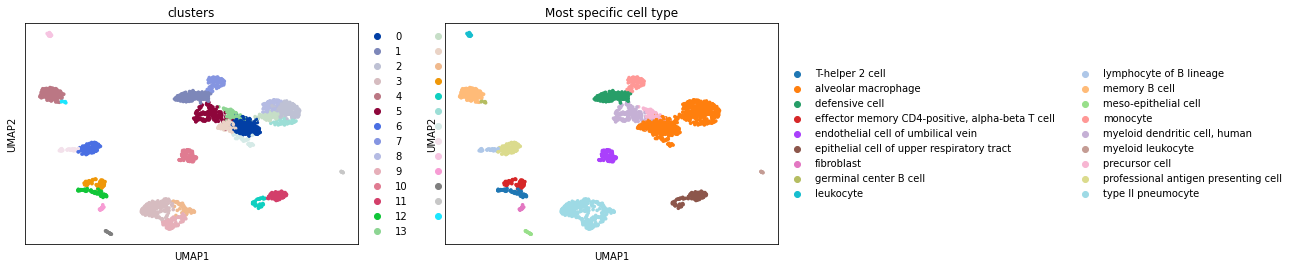

In [27]:
sc.pl.umap(adata, color=['leiden','Most specific cell type'],title='clusters')